In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from nltk.tokenize import sent_tokenize, word_tokenize 
import gensim 
from gensim.models import Word2Vec 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
import seaborn as sns
plt.style.use("seaborn")

Mounted at /content/drive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2369 entries, 0 to 2368
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Label      2369 non-null   bool   
 1   Binary     2369 non-null   int64  
 2   Source     2369 non-null   object 
 3   URL        2369 non-null   object 
 4   Date       2217 non-null   object 
 5   Title1     2369 non-null   object 
 6   Text       2369 non-null   object 
 7   Image      2369 non-null   object 
 8   Full Text  0 non-null      float64
 9   Title      2369 non-null   object 
dtypes: bool(1), float64(1), int64(1), object(7)
memory usage: 169.0+ KB


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Number of Real and Fake texts')

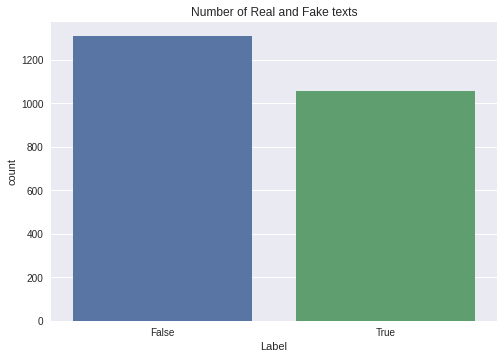

In [ ]:
#####################################################         Reading CSV        #################################################

from google.colab import drive
drive.mount('/content/drive')


PATH = os.getcwd()
DATADIR = PATH + '/drive/My Drive/Ds/D1.csv'
df = pd.read_csv(DATADIR,delimiter=',',encoding='latin-1')

df.info()     ############## To check dataframe df obtained from importing csv
sns.countplot(df.Label)
plt.xlabel('Label')
plt.title('Number of Real and Fake texts')
#plt.savefig('try.jpg')

In [ ]:
df.head()
df['Label'].value_counts()
#df['main_img_url'].value_counts()
#df.head()

False    1310
True     1059
Name: Label, dtype: int64

In [ ]:
#print(tr,fs)
data = df[["Label","Text","Title","Image"]]
print(data['Label'].value_counts())
data.columns

False    1310
True     1059
Name: Label, dtype: int64


Index(['Label', 'Text', 'Title', 'Image'], dtype='object')

In [ ]:
from sklearn.utils import shuffle
data = shuffle(data)    # Randomly shuffling the dataframe rows
data.reset_index(drop = True, inplace = True) 

In [ ]:
CATEGORIES = ['real', 'fake']
LENDIR=len(CATEGORIES)

#############################################################      Reading Image URL       ########################################################
from google.colab.patches import cv2_imshow
from skimage import io
import cv2
import urllib
import numpy as np
import imutils
from matplotlib import pyplot as plt

x=0
for i, j in data.iterrows(): 
  link=j["Label"]
  print(link)
  if(x%500==0):
    print(x)
  try:
    img_array = imutils.url_to_image(link)
    #print('1')
    #img_array=cv2.imread(link);
    #print(img_array)
    #cv2_imshow(img_array)
    ret,thresh_img1 = cv2.threshold(img_array,127,255,cv2.THRESH_BINARY)
    cv2_imshow(thresh_img1)
    #ret2,thresh_img2 = cv2.threshold(img_array,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    #cv2_imshow(thresh_img2)
    new_array = cv2.resize(thresh_img1, (128,128))
    cv2_imshow(new_array)
    x=x+1
    print(new_array.shape)
  except Exception as e:  # in the interest in keeping the output clean... 
    #data.drop(data[ data['main_img_url'] == link ].index, inplace = True)
    print('2')
    pass
    #print(i,j)
  if(x==5): 
    break;   #.....show only one

IMG_SIZE = 128




Streaming output truncated to the last 5000 lines.
0
2
False
0
2
False
0
2
False
0
2
False
0
2
False
0
2
True
0
2
True
0
2
True
0
2
True
0
2
False
0
2
True
0
2
False
0
2
True
0
2
False
0
2
False
0
2
True
0
2
False
0
2
False
0
2
False
0
2
True
0
2
False
0
2
False
0
2
False
0
2
True
0
2
False
0
2
False
0
2
False
0
2
True
0
2
True
0
2
True
0
2
False
0
2
False
0
2
False
0
2
False
0
2
False
0
2
False
0
2
True
0
2
False
0
2
False
0
2
False
0
2
True
0
2
False
0
2
True
0
2
False
0
2
True
0
2
True
0
2
False
0
2
False
0
2
True
0
2
False
0
2
False
0
2
False
0
2
False
0
2
True
0
2
False
0
2
False
0
2
True
0
2
False
0
2
False
0
2
False
0
2
True
0
2
False
0
2
False
0
2
False
0
2
False
0
2
True
0
2
True
0
2
True
0
2
True
0
2
False
0
2
True
0
2
True
0
2
False
0
2
False
0
2
False
0
2
False
0
2
True
0
2
True
0
2
True
0
2
False
0
2
True
0
2
True
0
2
True
0
2
False
0
2
False
0
2
True
0
2
False
0
2
True
0
2
False
0
2
False
0
2
False
0
2
True
0
2
False
0
2
True
0
2
True
0
2
True
0
2
False
0
2
True
0
2
False

In [ ]:
#################################################################    Lables Encoding    #######################################################
labelencoder = LabelEncoder()
#for i,j in data.iterrows():
  #j['type'] = labelencoder.fit_transform(j['type'])
Y = data.Label
Y = labelencoder.fit_transform(Y)
print(len(Y))
print(Y[:5])

2369
[0 0 1 0 1]


In [ ]:
##################################################################      Reading Image and directly convert to pixel array        ###########################################################
from google.colab.patches import cv2_imshow
from skimage import io
import cv2
import urllib
import numpy as np
import imutils

training_data_img = []

def create_training_data():
 
  x=0
  for i, j in data.iterrows(): 
    
    link=j['Image']
    #print(link)
    if(x%500==0):
      print(x)

    try:
      #img_array=io.imread(link);
      img_array = imutils.url_to_image(link)
      #print('1')
      #img_array=cv2.imread(link);
      #print(img_array)
      #cv2_imshow(img_array)
      ret,thresh_img1 = cv2.threshold(img_array,127,255,cv2.THRESH_BINARY)
      new_array = cv2.resize(thresh_img1, (128,128))
      #cv2_imshow(new_array)
      #print(new_array)
      #print(new_array.shape)
      x=x+1
      training_data_img.append([new_array,Y[i]])
      #print('1')
    except Exception as e:  # in the interest in keeping the output clean... 
      data.drop(data[ data['Image'] == link ].index, inplace = True)
      print('2')
      pass
      #print(i,j) 
 
create_training_data()
 
print(len(training_data_img))

0
2
0
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
500
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1000
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2

In [ ]:
print(type(training_data_img))            ######################  Checking the created image training data 
print(np.array(training_data_img).shape)
print(len(data))
#print(training_data_img[0])
#print(len(training_data_img[0][0]))
#print(len(training_data_img[0][0][0]))

<class 'list'>
(1750, 2)
1750


In [ ]:
#############################################################     Reshaping the image data   ######################################### 
X_img = []
labels = []
IMG_SIZE = 128

for features,label in training_data_img:
    X_img.append(features)
    labels.append(label)
 
#print(type(X_img))
#print(len(training_data_img))
#print(len(X_img))
#print(np.array(X_img).shape)
#print(np.array(X_img[0]).shape)
#print(np.array(X_img[0]))
#X_img = (np.array(X_img).astype(X_img))
X_img = np.array(X_img).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
#X_img = X_img/255.0
#print(np.array(training_data_img[0]).shape)
#print(np.array(X_img[0]).shape)
#X_img = np.array(training_data_img).reshape(-1, (IMG_SIZE, IMG_SIZE, 3))
#np.array(X_img).reshape(IMG_SIZE,IMG_SIZE,(3))

In [ ]:
X_img = X_img/255.0

In [ ]:
print(type(X_img))
print((X_img).shape)
print(len(training_data_img))
print(X_img[0])

<class 'numpy.ndarray'>
(1750, 128, 128, 3)
1750
[[[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 ...

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]]


In [ ]:
##############################################################      Reading Text       ################################################

X_text = data.Text

#X1,X2,Y1,Y2 = train_test_split(X_text,y_text,test_size=0.30)
X_text = X_text.astype(str)

max_words = 1000
max_len = 300
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_text)
sequences_1 = tok.texts_to_sequences(X_text) ###name training_data_text
training_data_text = sequence.pad_sequences(sequences_1,maxlen=max_len)


In [ ]:
print(type(training_data_text))
print((training_data_text).shape)
print(len(training_data_text))
print(training_data_text[0])

<class 'numpy.ndarray'>
(1750, 300)
1750
[ 57 294  40  43  38 432  19   1 433 377   6 709 264   2   4 606  75   9
   9 249   6  97  27  87 170  12   1  79 194 250 810 107   3 107   3 158
   6 107  10  39 490  38 140  43   5 463 843   5  67   5 623   4   1 138
  18 226   8 642  27 618  14   5 406   1 605   3  31 391 893 135  14 545
 654 230 631   6  37 539  12  25   6  70  20  46  86 340 271  19   1  37
   9   1   2 614 339 294   9 345  27   7 623   8   1   7 105 802  81 389
 101 273   5  37  60   1 406  18 855   5   2 303 149 728  98 545  18  46
 109 893 605  11   3 139   1 138   3 229 397 217  65  11  38   5 655 211
  19   3 391 893   5 138 131  65  91 549 266  40  10   1  10 392 614 463
   6  10   1 215  40  20   3  15   3 392 187  25 342  19   1 377   6 506
   9 432 167 392 607  47  24   3 392 507 631   4 198 316   1   4  83 811
   6 224   8  27   7   5  58 357   1   7   3  24 585   3  88  41  26 283
  27   7  22 562 258   1   3 122  12   1 201  87  15 211  19   8 201   2
   1   7  

In [ ]:
##############################################################      Reading Title      ################################################

X_title = data.Title

#X1,X2,Y1,Y2 = train_test_split(X_text,y_text,test_size=0.30)
X_title = X_title.astype(str)

max_words = 1000
max_len = 300
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_title)
sequences_2 = tok.texts_to_sequences(X_title) ###### name training_data_title
training_data_title = sequence.pad_sequences(sequences_2,maxlen=max_len)


In [ ]:
print(type(training_data_title))
print((training_data_title).shape)
print(len(training_data_title))
print(training_data_title[0])

<class 'numpy.ndarray'>
(1750, 300)
1750
[ 57 294  40  43  38 432  19   1 433 377   6 709 264   2   4 606  75   9
   9 249   6  97  27  87 170  12   1  79 194 250 810 107   3 107   3 158
   6 107  10  39 490  38 140  43   5 463 843   5  67   5 623   4   1 138
  18 226   8 642  27 618  14   5 406   1 605   3  31 391 893 135  14 545
 654 230 631   6  37 539  12  25   6  70  20  46  86 340 271  19   1  37
   9   1   2 614 339 294   9 345  27   7 623   8   1   7 105 802  81 389
 101 273   5  37  60   1 406  18 855   5   2 303 149 728  98 545  18  46
 109 893 605  11   3 139   1 138   3 229 397 217  65  11  38   5 655 211
  19   3 391 893   5 138 131  65  91 549 266  40  10   1  10 392 614 463
   6  10   1 215  40  20   3  15   3 392 187  25 342  19   1 377   6 506
   9 432 167 392 607  47  24   3 392 507 631   4 198 316   1   4  83 811
   6 224   8  27   7   5  58 357   1   7   3  24 585   3  88  41  26 283
  27   7  22 562 258   1   3 122  12   1 201  87  15 211  19   8 201   2
   1   7  

In [ ]:
###################################################################### Final Train and Test set #############################################

fin_X = []

total_data = len(training_data_text)
for i in range(1750):
  fin_X.append([X_img[i], training_data_text[i]])


In [ ]:
print(len(fin_X))
print(np.array(fin_X).shape)
print(labels[0:5])

1750
(1750, 2)
[0, 1, 0, 1, 0]


In [ ]:
print(type(fin_X))
print(np.array(fin_X[0]).shape)
print(len(fin_X))
print(fin_X[0][0])
print("Hello")
print(fin_X[1][0])
print("Hello")
print(fin_X[2][0])
#print("Hello")
#print(fin_X[0][1])
#print("Hello")
#print(fin_X[0][2])

<class 'list'>
(2,)
1750
[[[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 ...

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]]
Hello
[[[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 [[0.05490196 0.05490196 0.05490196]
  [0.05490196 0.05490196 0.05490196]
  [0.05490196 0.05490196 0.05490196]
  ...
  [0.05490196 0.05490196 0.05490196]
  [0.05490196 0.05490196 0.05490196]
  [0.05490196 0.05490196 0

In [ ]:
#########################################################################     Splitting final set to train and test     #########################################

X_train,X_test,Y_train,Y_test = train_test_split(fin_X,labels,test_size=0.30)

#print(Y_train[0])

In [ ]:
print(type(X_train))
print(np.array(X_train).shape)
print(np.array(X_train[0][0]).shape)
print(np.array(X_train[0][1]).shape)
#print(np.array(X_train[0][2]).shape)
print(len(X_train))
print(type(X_train))
print(type(X_train[0]))
print(type(X_train[0][0]))
print(type(X_train[0][1]))
#print(type(X_train[0][2]))
print(type(Y_train))
print(type(Y_train[0]))
print((Y_train[0]))

print(type(X_test[0][0]))

print(type(Y_test))
print(np.array(Y_train).shape)
print(len(Y_train))

#print(X_train[0],Y_train[0])

<class 'list'>
(1225, 2)
(128, 128, 3)
(300,)
1225
<class 'list'>
<class 'list'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'list'>
<class 'numpy.int64'>
1
<class 'numpy.ndarray'>
<class 'list'>
(1225,)
1225


In [ ]:
import numpy as np
from sklearn.model_selection import KFold
X_trainn = np.array(X_train)
y_trainn = np.array(Y_train)
kf = KFold(n_splits=5)
kf.get_n_splits(X_trainn)

5

In [ ]:
#######################################################  Extracting image data from final train and test dataset     #######################################
X_train_img = []            
X_test_img = []                 

for i in range(len(X_train)):
  temp1 = X_train[i][0].tolist()
  X_train_img.append(temp1)
  
for i in range(len(X_test)):
  temp1 = X_test[i][0].tolist()
  X_test_img.append(temp1)
 

In [ ]:
print(type(X_train_img))
X_train_img = np.array(X_train_img)
print(type(X_train_img))
print(np.array(X_train_img).shape)
print(len(X_train_img))

print(type(X_test_img))
X_test_img = np.array(X_test_img)
print(type(X_test_img))
print(np.array(X_test_img).shape)
print(len(X_test_img))

print(type(Y_train))
Y_train = np.array(Y_train)
print(type(Y_train))
print(np.array(Y_train).shape)
print(len(Y_train))

print(type(Y_test))
Y_test = np.array(Y_test)
print(type(Y_test))
print(np.array(Y_test).shape)
print(len(Y_test))

<class 'list'>
<class 'numpy.ndarray'>
(1225, 128, 128, 3)
1225
<class 'list'>
<class 'numpy.ndarray'>
(525, 128, 128, 3)
525
<class 'list'>
<class 'numpy.ndarray'>
(1225,)
1225
<class 'list'>
<class 'numpy.ndarray'>
(525,)
525


In [ ]:
########################################################################     CNN model for images    ############################################################
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.utils.vis_utils import plot_model

############## Part 1 - Initialising the CNN ------>
classifier_img = Sequential()

###### Convolution layer1 ->
classifier_img.add(Conv2D(32, (3, 3), input_shape = (128, 128, 3), activation = 'relu'))
classifier_img.add(MaxPooling2D(pool_size = (2, 2)))

###### Convolution layer2 ->
classifier_img.add(Conv2D(64, (3, 3), activation = 'relu'))
classifier_img.add(MaxPooling2D(pool_size = (2, 2)))

###### Convolution layer3 ->
classifier_img.add(Conv2D(128, (3, 3), activation = 'relu'))
classifier_img.add(MaxPooling2D(pool_size = (2, 2)))

###### Flattening ->


###### Full Connection ->
classifier_img.add(Dense(units = 256, activation = 'relu'))
classifier_img.add(Dropout(0.4))
classifier_img.add(Flatten())
#classifier_img.add(Dense(units = 1, activation = 'sigmoid'))  ####output1
#plot_model(classifier_img, to_file='classifier_img_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
################################################################       Extracting text data from final train and test dataset     #######################################
X_train_text = []

X_test_text = []

for i in range(len(X_train)):
  temp1 = X_train[i][1].tolist()
  X_train_text.append(temp1)
  
for i in range(len(X_test)):
  temp1 = X_test[i][1].tolist()
  X_test_text.append(temp1)
 

In [ ]:
print(type(X_train_text))
X_train_text = np.array(X_train_text)
print(type(X_train_text))
print(np.array(X_train_text).shape)
print(len(X_train_text))

print(type(X_test_text))
X_test_text = np.array(X_test_text)
print(type(X_test_text))
print(np.array(X_test_text).shape)
print(len(X_test_text))

print(type(Y_train))
Y_train = np.array(Y_train)
print(type(Y_train))
print(np.array(Y_train).shape)
print(len(Y_train))

print(type(Y_test))
Y_test = np.array(Y_test)
print(type(Y_test))
print(np.array(Y_test).shape)
print(len(Y_test))

<class 'list'>
<class 'numpy.ndarray'>
(1225, 300)
1225
<class 'list'>
<class 'numpy.ndarray'>
(525, 300)
525
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(1225,)
1225
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(525,)
525


In [ ]:
#######################################################################      LSTM model for text     ###############################################

from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding, Bidirectional, Concatenate, BatchNormalization
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils.vis_utils import plot_model

max_words = 1000
max_len = 300

classifier_title = Sequential()
classifier_title.add(Embedding(max_words,50,input_length=max_len))
classifier_title.add(LSTM(64))
classifier_title.add(Dense(256,name='FC1'))
classifier_title.add(BatchNormalization())
classifier_title.add(Activation('relu'))
classifier_title.add(Dropout(0.5))
classifier_title.add(Flatten())
#classifier_text.add(Dense(1,name='out_layer'))
#classifier_text.add(Activation('sigmoid'))
#plot_model(classifier_text, to_file='classifier_text_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
merged_model = Concatenate() ([classifier_img.output, classifier_title.output])

x = Dense(512, activation='relu')(merged_model)
x = Dropout(0.4)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.4)(x)
'''x = Dense(32, activation='relu')(x)
x = Dropout(0.2)(x)'''
output = Dense(1, activation= 'sigmoid')(x)

In [ ]:
final_model = Model(inputs=[classifier_img.input, classifier_title.input], outputs = [output])

In [ ]:
final_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
final_model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
conv2d_input (InputLayer)       [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 126, 126, 32) 896         conv2d_input[0][0]               
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 63, 63, 32)   0           conv2d[0][0]                     
__________________________________________________________________________________________________
embedding_1_input (InputLayer)  [(None, 300)]        0                                            
_______________________________________________________________________________________

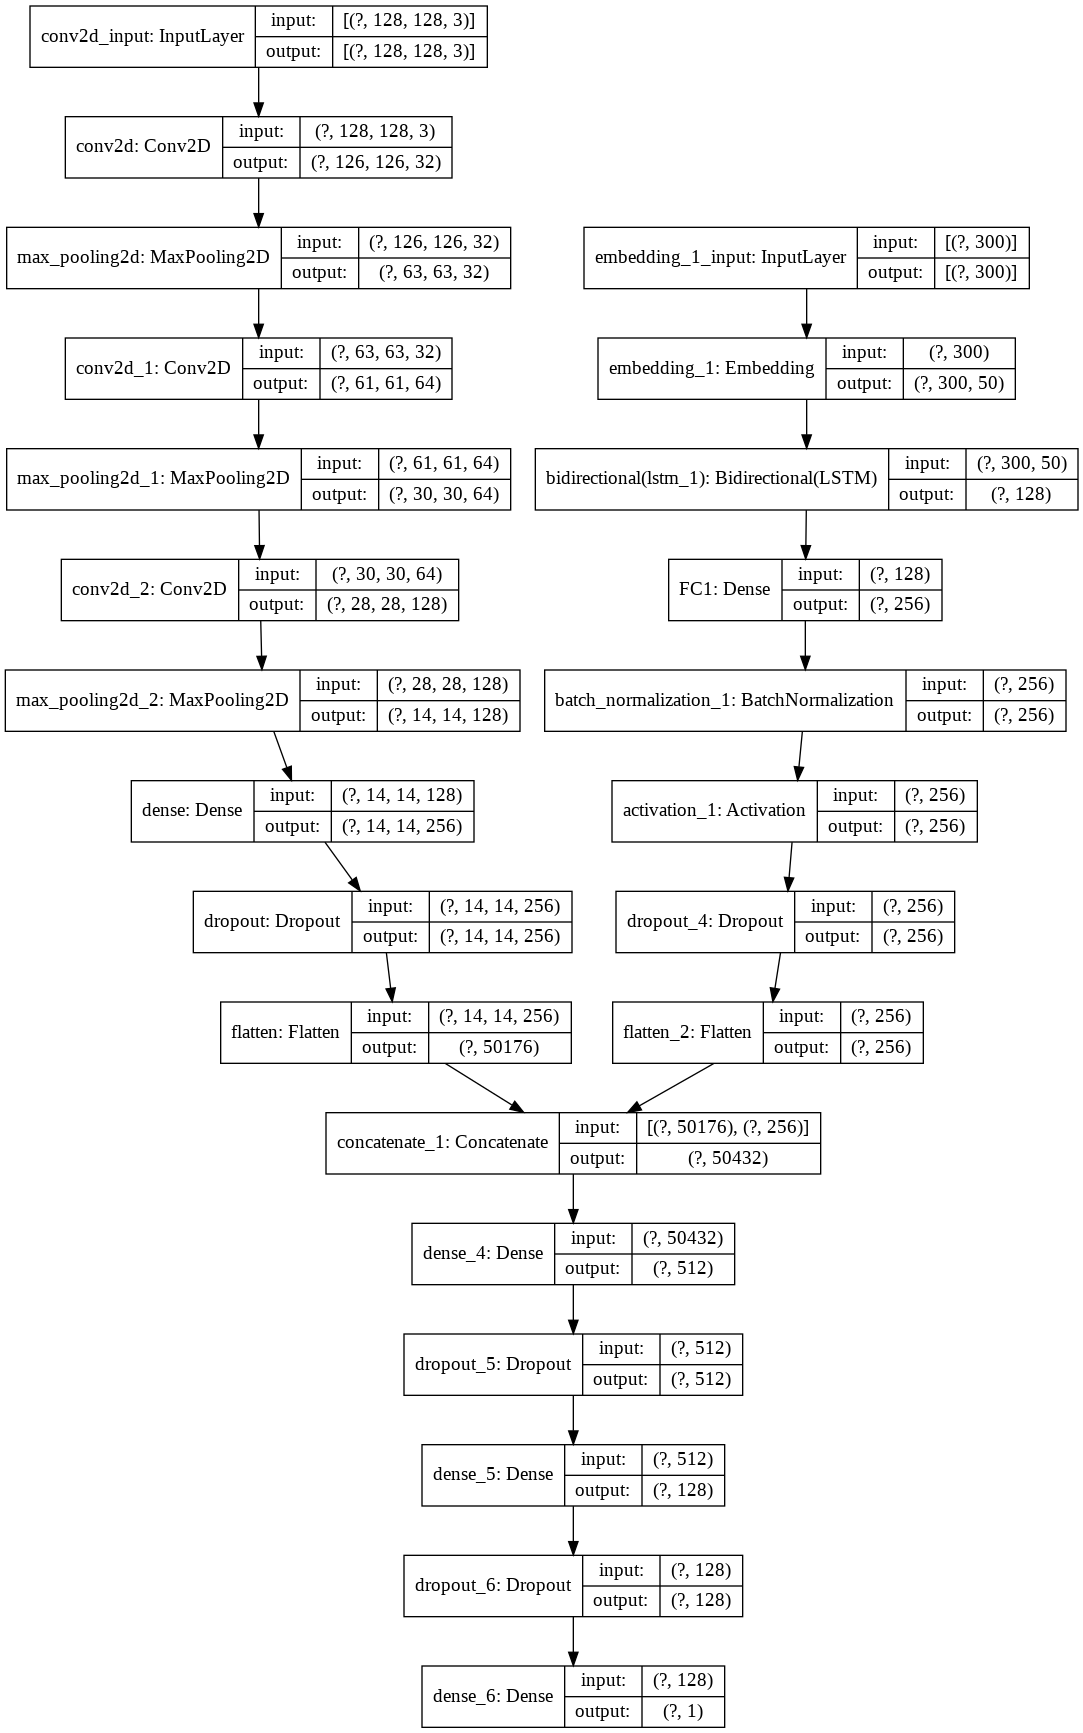

In [ ]:
plot_model(final_model, to_file='earlyfusionmodel.png', show_shapes=True, show_layer_names=True)

In [ ]:
history1 = final_model.fit([X_train_img, X_train_text], Y_train,batch_size=64,epochs=15,verbose=1,validation_split=0.3)

Epoch 1/15
14/14 [==============================] - 34s 2s/step - loss: 0.5006 - accuracy: 0.7305 - val_loss: 0.4577 - val_accuracy: 0.8207
Epoch 2/15
14/14 [==============================] - 33s 2s/step - loss: 0.2935 - accuracy: 0.8763 - val_loss: 0.4233 - val_accuracy: 0.8288
Epoch 3/15
14/14 [==============================] - 33s 2s/step - loss: 0.1905 - accuracy: 0.9277 - val_loss: 0.4515 - val_accuracy: 0.8043
Epoch 4/15
14/14 [==============================] - 33s 2s/step - loss: 0.1374 - accuracy: 0.9428 - val_loss: 0.4617 - val_accuracy: 0.8234
Epoch 5/15
14/14 [==============================] - 33s 2s/step - loss: 0.0619 - accuracy: 0.9708 - val_loss: 0.6962 - val_accuracy: 0.8179
Epoch 6/15
14/14 [==============================] - 33s 2s/step - loss: 0.0271 - accuracy: 0.9895 - val_loss: 0.6351 - val_accuracy: 0.8071
Epoch 7/15
14/14 [==============================] - 33s 2s/step - loss: 0.0266 - accuracy: 0.9883 - val_loss: 0.8476 - val_accuracy: 0.8152
Epoch 8/15
14/14 [==

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


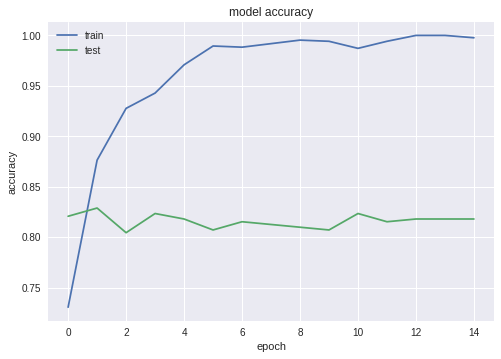

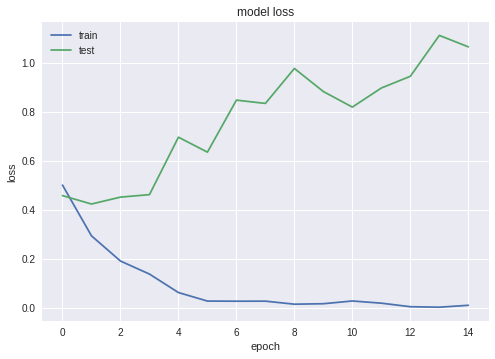

In [ ]:
print(history1.history.keys())
##################### summarize history for accuracy
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
###################### summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

Y_pred = final_model.predict([X_test_img, X_test_text])
# Y_pred_prob_img = classifier_text.predict_proba(test_feat_vgg)

cm_img = confusion_matrix(Y_test, Y_pred.round())
print(cm_img)
print("\n")
accuracy_img = accuracy_score(Y_test, Y_pred.round())
print('Accuracy: %f' % accuracy_img)

[[154  68]
 [ 22 281]]


Accuracy: 0.828571


In [ ]:
###################        Save Image Model      ####################
final_model.save("final_model.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
# load and evaluate a saved model
from keras.models import load_model
 
# load model
final_model = load_model('final_model.h5')
# summarize model.
print(final_model.summary())

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
conv2d_input (InputLayer)       [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 126, 126, 32) 896         conv2d_input[0][0]               
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 63, 63, 32)   0           conv2d[0][0]                     
__________________________________________________________________________________________________
embedding_1_input (InputLayer)  [(None, 300)]        0                                            
_______________________________________________________________________________________

In [ ]:
#################################################   Blue Cnf matrix  #####################################################
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm1,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
  accuracy = np.trace(cm1) / float(np.sum(cm1))
  misclass = 1 - accuracy

  if cmap is None:
    cmap = plt.get_cmap('Blues')

  plt.figure(figsize=(6, 4))
  plt.imshow(cm1, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()

  if target_names is not None:
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)

  if normalize:
    cm1 = cm1.astype('float') / cm1.sum(axis=1)[:, np.newaxis]

  thresh = cm1.max() / 1.5 if normalize else cm1.max() / 2
  for i, j in itertools.product(range(cm1.shape[0]), range(cm1.shape[1])):
    if normalize:
      plt.text(j, i, "{:0.4f}".format(cm1[i, j]),
            horizontalalignment="center",
            color="white" if cm1[i, j] > thresh else "black")
    else:
      plt.text(j, i, "{:,}".format(cm1[i, j]),
            horizontalalignment="center",
            color="white" if cm1[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
  plt.show()

[[154  68]
 [ 22 281]]


Accuracy: 0.828571


              precision    recall  f1-score   support

           0       0.88      0.69      0.77       222
           1       0.81      0.93      0.86       303

    accuracy                           0.83       525
   macro avg       0.84      0.81      0.82       525
weighted avg       0.83      0.83      0.82       525

roc_auc_score = 0.9085570719234086


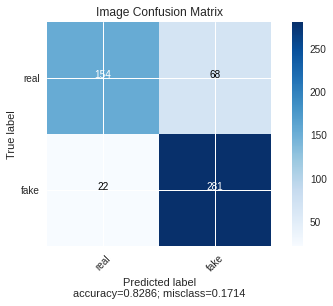

In [ ]:
###################################################   Results of VGG16 over Images    ########################################
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score

Y_pred = final_model.predict([X_test_img, X_test_text])
#Y_pred_prob = final_model.predict_proba([test_feat_vgg, X_test_title])
cm_img = confusion_matrix(Y_test, Y_pred.round())
print(cm_img)
print("\n")
accuracy_img = accuracy_score(Y_test, Y_pred.round())
print('Accuracy: %f' % accuracy_img)
print("\n")

classreport_img = classification_report(Y_test, Y_pred.round())
print(classreport_img)
print("roc_auc_score =",roc_auc_score(Y_test, Y_pred, average='macro'))

plot_confusion_matrix(cm1 =cm_img, normalize = False,target_names = ['real','fake'],title = "Image Confusion Matrix")

No Skill: ROC AUC=0.500
VGG16: ROC AUC=0.912


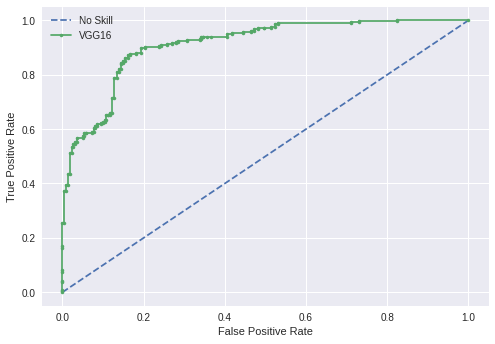

In [ ]:
###################################################   ROC for Images    ########################################
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(Y_test))]

# predict probabilities
lr_probs = Y_pred
# keep probabilities for the positive outcome only
#lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(Y_test, ns_probs)
lr_auc = roc_auc_score(Y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('VGG16: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(Y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='VGG16')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()